In [1]:
# 실습에 사용할 파일 불러오기.
# data > melb_data.csv
# utf8(설정 안 해도 됨)
import pandas as pd
house_data = pd.read_csv("./data/melb_data.csv", encoding = 'utf8')

- 맬버른 지역에서 주택을 구매하려는 소비자를 위한 분석 수행
- 실제 매물 데이터를 활용해 위치(위경도), 거리, 방 개수, 주차 공간이 주택 각겨에 어떻게 반영되는지 분석
- 분석 결과를 바탕으로 주택 구매 시 어떤 요소가 가장 큰 영향을 미치는지 예측하고, 투자 전력에 적용해보고자 함

In [2]:
# 지난 시간에는 분류(번주형 자료를 예측) 모델을 실습
# 집 가격 분석 및 예측 -> 수치형 자료 : 회귀모델(선형 회귀 모델을 이해해보자.)

| 컬럼명          | 설명                                                              |
|-----------------|-----------------------------------------------------------------|
| **Suburb**      | 주택이 위치한 교외 지역의 이름                                         |
| **Address**     | 주택의 주소                                                        |
| **Rooms**       | 주택의 방 개수                                                     |
| **Type**        | 주택 유형 (h: 주택, u: 유닛, t: 타운하우스)                             |
| **Price**       | 주택 가격                                                         |
| **Method**      | 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가격 공개) |
| **SellerG**     | 판매 대행 부동산 중개인의 이름                                         |
| **Date**        | 판매 날짜                                                         |
| **Distance**    | 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (킬로미터 단위)                 |
| **Postcode**    | 우편번호                                                          |
| **Bedroom2**    | 주택의 침실 개수 (2개의 침실을 갖춘 주택)                               |
| **Bathroom**    | 주택의 욕실 개수                                                    |
| **Car**         | 주차 가능한 자동차 수                                                |
| **Landsize**    | 대지 면적 (평방 미터 단위)                                            |
| **BuildingArea**| 건축 면적 (평방 미터 단위)                                            |
| **YearBuilt**   | 주택이 건축된 연도                                                   |
| **CouncilArea** | 관할 구역                                                         |
| **Lattitude**   | 주택의 위도                                                        |
| **Longtitude**  | 주택의 경도                                                        |
| **Regionname**  | 지역 이름                                                         |
| **Propertycount**| 지역 내의 부동산 개수                                                |

In [3]:
# 데이터 확인
# 정보 : 컬럼의 정보 확인
# dtype을 확인하는 이유. 문자열로 이루어진 자료는 수치형으로 바꿔주는 인코딩 과정을 거쳐야함.
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
# 각 컬럼별로 결측치 몇 개 있는지 확인
# 결측치 개수가 많은 순서대로 정렬
print(house_data.isnull().sum().sort_values(ascending = False))
# BuildingArea(건축면적), YearBuilt(주택이 건축된 연도), CouncilArea(관할구역), Car(주차 가능 자동차 수)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Price               0
Type                0
Rooms               0
Address             0
Distance            0
Method              0
Date                0
SellerG             0
Bathroom            0
Bedroom2            0
Postcode            0
Landsize            0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


### EDA(탐색적 데이터 분석)
- 기술 통계 확인
- 시각화

In [5]:
# 라이브러리 먼저 불러오기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
house_data.describe()
# 수치형만 통계를 구해줌

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
house_data.describe(include = 'object')
# CouncilArea에는 결측치가 존재해서 13580개가 아닌 12211개가 나왔음

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,5 Charles St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [8]:
house_data.CouncilArea.size
# 결측치 포함해서 데이터 크기 확인

13580

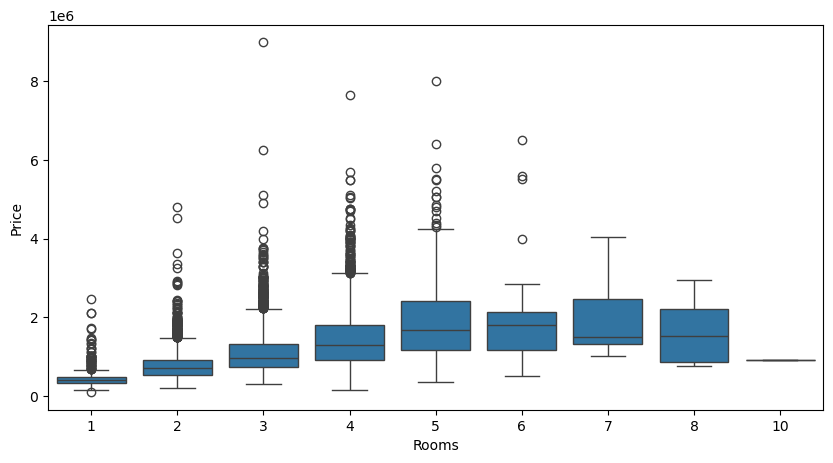

In [9]:
# boxplot : 이상치 탐색할 때 확인했던 그래프, 이번에는 값의 변화 추이를 확인
# 방 개수와 주택 가격 분포 현황 확인
plt.figure(figsize = (10, 5))
sns.boxplot(data = house_data, x = 'Rooms', y = 'Price')
plt.show()

# 1~5개 : 방 개수가 증가할수록 주택 가격의 중앙값 상승
# 6개 이상 : 방개수와 주택 가격 사이에 연관성이 없음

In [10]:
house_data['Type'].unique()
# 'h' : 주택, 'u' : 유닛, 't' : 타운하우스

array(['h', 'u', 't'], dtype=object)

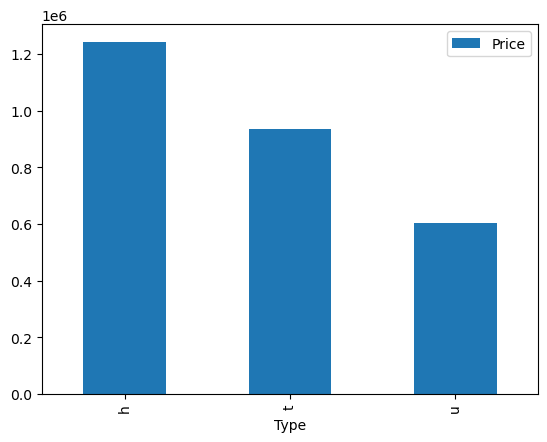

In [11]:
# 주택 타입별로 가격 평균확인
# 1. 타입, 가격 인덱싱

# 2. 타입별로 그룹지어서 가격 평균 확인

# 3. 세로 막대 그래프(plt, plot)
house_data[['Type', 'Price']].groupby('Type').mean().plot(kind = 'bar')
plt.show()
# boxplot : 방 개수가 6개 이상이면 값이 비교적 높음
# bar : house(주택)이 가장 평균적인 가격이 높음
# 방 개수가 6개 이상이고 주택이면 집값이 높겠다. 예측 가능.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io

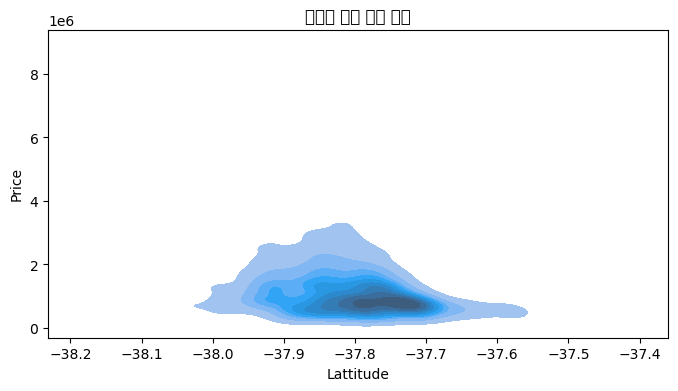

In [12]:
# 위도-가격에 따른 밀도 확인
# seaborn -> kde plot
plt.figure(figsize = (8, 4))
sns.kdeplot(data = house_data, x = 'Lattitude', y = 'Price', fill = True)
plt.title('위도와 가격 밀도 차트')
plt.show()

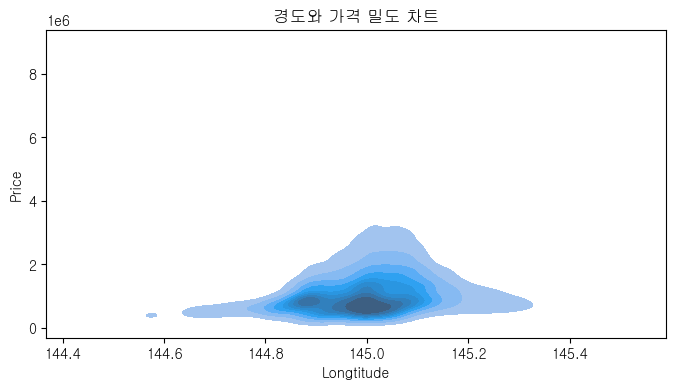

In [13]:
# 경도-가격에 따른 밀도 확인
# 색깔 나오게
# 제목 : 경도와 가격 밀도 차트
# 한글 제목 출력되게.
plt.figure(figsize = (8, 4))
plt.rcParams['font.family'] = 'Gulim'
sns.kdeplot(data = house_data, x = 'Longtitude', y = 'Price', fill = True)
plt.title('경도와 가격 밀도 차트')
plt.show()

### 분류 평가 지표
> 혼돈행렬
> - TP : 양성으로 예측, O
> - FP : 양성으로 예측, X
> - TN : 음성으로 예측, O
> - FN : 음성으로 예측, X

> 정확도(accuracy)
> - 전체 데이터 중에 맞춘 개수의 비율

> 정밀도(Precision)
> - 얼마나 정밀하게 맞추는가?
> - 양성으로 예측한 것 중에서 맞춘 비율

> 재현율(recall)
> - 양성인 것을 얼마나 잘 걸러내는가
> - 실제 양성인 것 중에서 맞춘 비율

In [14]:
plt.rcParams["font.family"] = "Malgun Gothic" # 한글 폰트 설정
plt.rcParams["axes.unicode_minus"] = False # 마이너스 깨짐 방지

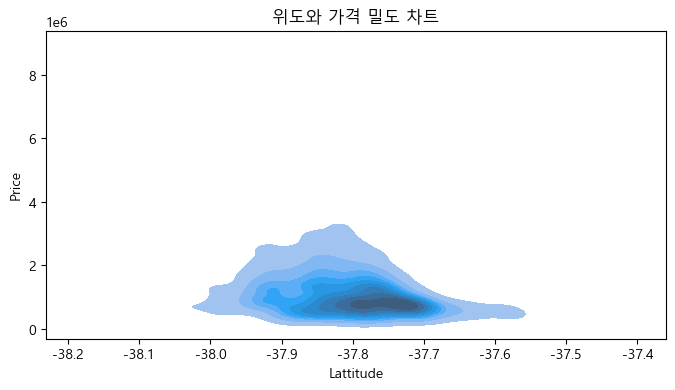

In [15]:
plt.figure(figsize = (8, 4))
sns.kdeplot(data = house_data, x = 'Lattitude', y = 'Price', fill = True)
plt.title('위도와 가격 밀도 차트')
plt.show()

# 위도 약 -37.8 부근이 가장 높은 가격대를 형성하고 있음
# 위도 약 -37.8 ~ -37.7 부근이 가장 많은 빈도가 관측됨

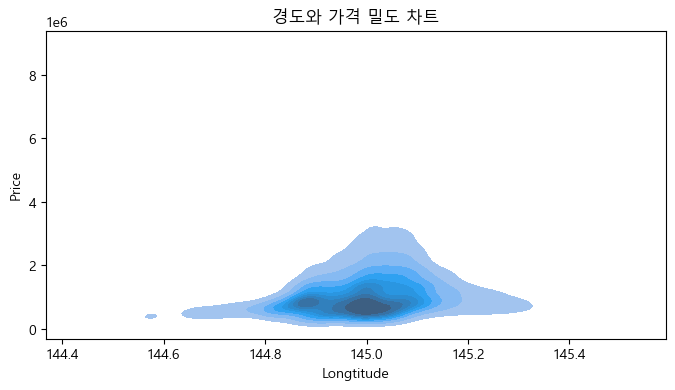

In [16]:
plt.figure(figsize = (8, 4))
sns.kdeplot(data = house_data, x = 'Longtitude', y = 'Price', fill = True)
plt.title('경도와 가격 밀도 차트')
plt.show()

# 경도 약 145 부근이 가장 높은 가격대를 형성하고 있음
# 경도 약 145.0 ~ 145.1 부근이 가장 많은 빈도를 보임

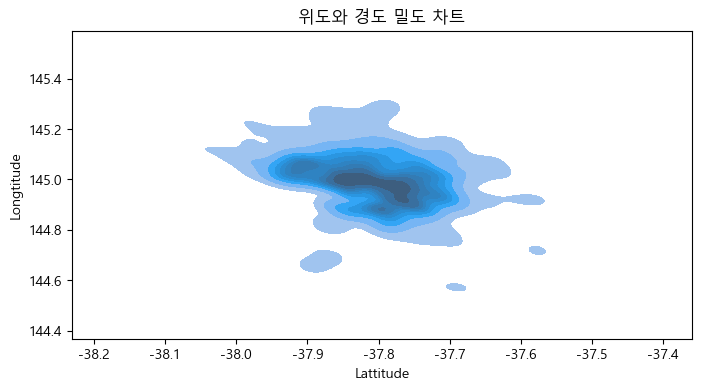

In [17]:
# 위도와 경도 간의 밀도 차트
plt.figure(figsize = (8, 4))
sns.kdeplot(data = house_data, x = 'Lattitude', y = 'Longtitude', fill = True)
plt.title('위도와 경도 밀도 차트')
plt.show()

# 멜버른 시내에서 동쪽으로 조금 떨어진 이너 이스트 지역이 가장 많은 분포를 보임
# 대략적으로 멜버른 동쪽 (-37.8, 약 145 부근)에서 밀집도가 가장 높았다.

In [18]:
# 관할구역 확인
house_data["CouncilArea"].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [19]:
# 위에서 위도와 경도를 살펴본 결과, 위치에 따라 가격과 밀도가 차이가 있다는 것을 확인.
# 그래서, 관할구역 별로는 어떤 인사이트가 있는지 확인해보자.

In [20]:
# countplot의 order 기준
house_data["CouncilArea"].value_counts().index

Index(['Moreland', 'Boroondara', 'Moonee Valley', 'Darebin', 'Glen Eira',
       'Stonnington', 'Maribyrnong', 'Yarra', 'Port Phillip', 'Banyule',
       'Bayside', 'Melbourne', 'Hobsons Bay', 'Brimbank', 'Monash',
       'Manningham', 'Whitehorse', 'Kingston', 'Whittlesea', 'Hume', 'Wyndham',
       'Knox', 'Maroondah', 'Melton', 'Frankston', 'Greater Dandenong',
       'Casey', 'Nillumbik', 'Yarra Ranges', 'Cardinia', 'Macedon Ranges',
       'Unavailable', 'Moorabool'],
      dtype='object', name='CouncilArea')

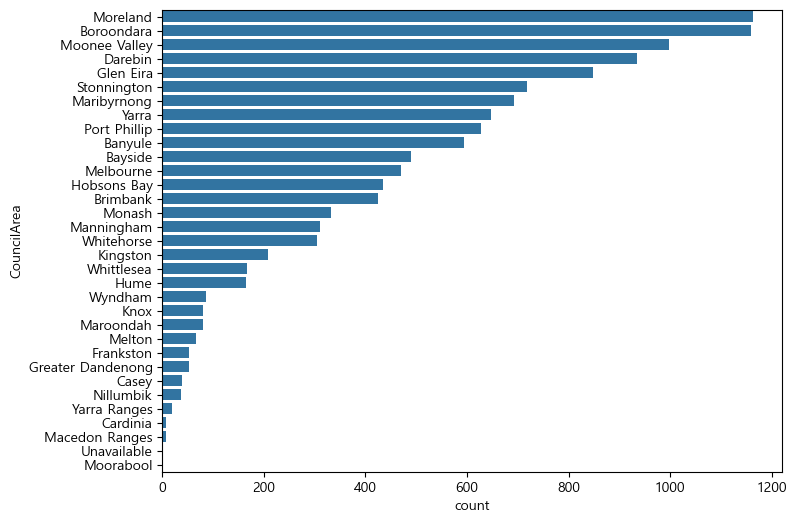

In [21]:
# 관할구역 기준으로 주택의 수 분포 확인 (막대)
plt.figure(figsize = (8, 6))
sns.countplot(data = house_data, y = "CouncilArea", order = house_data["CouncilArea"].value_counts().index)
plt.show()

# Boroondara는 두 번째로 많음 → 위도경도 차트에서 확인되었던 동부권 지역과 일치한 정보를 나타냄.

In [22]:
# BuildingArea(건축면적), YearBuilt(주택이 건축된 연도), CouncilArea(관할구역), Car(주차 가능 자동차 수)

# 단순하게 결측치 채우기 (반영 X)
house_data["CouncilArea"].fillna("Moreland")

# 결측치를 채울 때 단순 기술통계치(최빈, 평균, 중앙 등)로 채우는 것은 권장되지는 않음
# 연관성이 있는 데이터로 채워줌으로써, 모델의 성능을 높일 수 있다.
# ex. 클러스터링을 통한 결측치 채우기, 상관관계가 높은 다른 특성을 활용해서 채우기, 모델을 활용해서 채우기 등

0           Yarra
1           Yarra
2           Yarra
3           Yarra
4           Yarra
           ...   
13575    Moreland
13576    Moreland
13577    Moreland
13578    Moreland
13579    Moreland
Name: CouncilArea, Length: 13580, dtype: object

In [23]:
# Suburb(지역이름)을 통해서 관할구역 결측치를 채워보자.

In [24]:
# 판다스 옵션 설정 - 전체 행 출력하기
pd.set_option("display.max_rows", None)

In [25]:
# 피봇테이블 생성 - 지역이름과 관할구역은 어떤 관계를 나타내는지
house_data.pivot_table(
    values = "Rooms",                  # 확인하고자 하는 값 (빈도를 확인하는 용도로 결측치가 아닌 아무런 컬럼 지정)
    index = ["Suburb", "CouncilArea"], # 묶는 기준
    aggfunc = "count"                  # 확인하고자 하는 값의 집계함수 설정
)

# 매핑 구조 결과, 대부분 하나의 Suburb는 하나의 CouncilArea로 매핑되어 있음.
# "CouncilArea가 비어있던 결측치 데이터"를 "Suburb를 통해 비어있지 않은 CouncilArea"를 참고해서 결측치를 채워볼 수 있음.

Rooms
Suburb             CouncilArea             
Abbotsford         Yarra                 55
Aberfeldie         Moonee Valley         40
Airport West       Moonee Valley         61
Albanvale          Brimbank               4
Albert Park        Port Phillip          64
Albion             Brimbank              38
Alphington         Darebin               25
                   Yarra                  7
Altona             Hobsons Bay           69
Altona Meadows     Hobsons Bay            4
Altona North       Hobsons Bay           49
Ardeer             Brimbank               2
Armadale           Stonnington           86
Ascot Vale         Moonee Valley        125
Ashburton          Boroondara            53
Ashwood            Monash                45
Aspendale          Kingston               4
Aspendale Gardens  Kingston               2
Avondale Heights   Moonee Valley         73
Bacchus Marsh      Moorabool              1
Balaclava          Port Phillip          25
Balwyn             Boroondara           101
Balwyn North       Boroondara           151
Bayswater          Knox                  12
Bayswater North    Maroondah              5
Beaconsfield       Cardinia               2
Beaconsfield Upper Cardinia               1
Beaumaris          Bayside               11
Bellfield          Banyule               15
Bentleigh          Glen Eira            131
Bentleigh East     Glen Eira            234
Berwick            Casey                 11
Black Rock         Bayside                8
Blackburn          Whitehorse            13
Blackburn North    Whitehorse             7
Blackburn South    Whitehorse             8
Bonbeach           Kingston               1
Boronia            Knox                  12
Box Hill           Whitehorse            54
Braybrook          Maribyrnong           44
Briar Hill         Banyule                5
Brighton           Bayside              176
Brighton East      Bayside              124
                   Glen Eira              4
Broadmeadows       Hume                  17
Brookfield         Melton                 1
Brooklyn           Brimbank               1
                   Hobsons Bay            7
Brunswick          Moreland             208
Brunswick East     Moreland              80
Brunswick West     Moreland             102
Bulleen            Manningham            65
Bullengarook       Macedon Ranges         1
Bundoora           Banyule               13
                   Darebin                2
                   Whittlesea            10
Burnley            Yarra                  7
Burnside Heights   Melton                 2
Burwood            Monash                14
                   Whitehorse            61
Burwood East       Whitehorse            12
Cairnlea           Brimbank               7
Camberwell         Boroondara           124
Campbellfield      Hume                   3
Canterbury         Boroondara            51
Carlton            Melbourne             48
Carlton North      Yarra                 44
Carnegie           Glen Eira            138
Caroline Springs   Melton                 9
Carrum             Kingston               9
Carrum Downs       Frankston              7
Caulfield          Glen Eira             12
Caulfield East     Glen Eira              8
Caulfield North    Glen Eira             35
Caulfield South    Glen Eira             45
Chadstone          Monash                34
Chelsea            Kingston               4
Chelsea Heights    Kingston               2
Cheltenham         Bayside                4
                   Kingston              26
Chirnside Park     Yarra Ranges           2
Clarinda           Kingston               2
Clayton            Monash                11
Clayton South      Kingston               3
Clifton Hill       Yarra                 52
Coburg             Moreland             176
Coburg North       Darebin                1
                   Moreland              53
Collingwood        Yarra                 62
Coolaroo           Hume           

In [26]:
# 결측치 채우기

In [27]:
# 1. 참고용 테이블(결측치 채우는 함수에 활용할 예정)

# Suburb별 CouncilArea 최빈값 테이블 생성
mode_data = house_data.groupby("Suburb")["CouncilArea"].agg(pd.Series.mode)

In [28]:
# 전체 행 출력 원상복구
pd.reset_option("display.max_rows")

In [29]:
# 2. 결측치 채우는 함수
def fill_council(row) : # apply에서 axis = 1로 설정할 경우, 행이 하나씩 넘어온다.
    if pd.isnull(row["CouncilArea"]) : #  행의 관할구역이 비어있니.
        return mode_data[row["Suburb"]] # 해당 행의 Suburb를 인덱스 재료로 활용해서, CouncilArea를 반환.
    else :
        return row["CouncilArea"]

In [30]:
# 3. apply() : 함수를 적용하는 함수.
house_data["CouncilArea"] = house_data.apply(fill_council, axis = 1)

In [31]:
house_data["CouncilArea"].isnull().sum()

np.int64(0)

In [32]:
# 컬럼명 수정 방법.
# 수정, 추가 → 지정하고 대입.
house_data = house_data.rename(columns = {"Lattitude" : "Latitude", "Longtitude" : "Longitude"})

In [33]:
house_data.info()
# BuildingArea, YearBuilt, Car 결측치 컬럼
# Price 컬럼과 관성이 떨어지는 컬럼은 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    13580 non-null  object 
 17  Latitude       13580 non-null  float64
 18  Longit

In [34]:
# 상관관계를 살펴보자.
house_corr = house_data.corr(numeric_only = True)
# 상관관계는 수치형 자료끼리만 구할 수 있어서 수치형 자료만 구할 수 있도록 조절

In [35]:
# 학습에 사용될 컬럼이 너무 많음
# 상관계수를 사용해서 Price와 관계성이 떨어지는 변수는 제외하고 학습을 하자.
# 상관계수가 0.15 이상인 값만 고르자

house_corr['Price'].abs().sort_values(ascending = False) # 방향을 제외하고 크기만 확인 -> abs()
# 큰값먼저 확인하기 위해서 내림차순으로 정렬
# Rooms, Bedroom2, Bathroom 컬럼이 가장 연관성이 높음
# YearBuilt도 비교적 연관성이 높은 컬럼
# Postcode 아래 컬럼은 연관성이 떨어짐 → 제외

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Latitude         0.212934
Longitude        0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64

In [36]:
# 1. 사용할 컬럼 이름만 가져오기.
# 0.15 이상의 컬럼의 이름만 가져오기.

corr_price = house_corr['Price'].abs().sort_values(ascending = False)
feature_names = corr_price[corr_price >= 0.15].index
# 상관계수 구할 때 numeric_only 옵션을 통해 수치형 자료만 꺼내왔었음
# object 타입의 컬럼 중에 어떤 것을 추가할 것인지 선택
# 주택(h) 타입이 평균적으로 가격이 높았음 -> Type 컬럼 포함
# CouncilArea 컬럼 결측치 처리를 했으므로 포함(성능 향상에 도움이 될지는 아직 모름 → 테스트가 필요)

# DataFrame()
# Series()
feature_names = list(feature_names) + ['Type', 'CouncilArea']
# feature_names 안에 들어있는 값을 이용해서 list 생성

In [37]:
# DF에서 여러 컬럼을 한번에 인덱싱할 때 컬럼 이름을 list로 묶어서 전달
selected_data = house_data[feature_names].copy()
selected_data
# 얕은 복사 : 원본 객체와 복사된 객체가 같은 메모리를 사용
# 실제로 ㄹ 복사한 것이 아니라 별칭을 새로 만들어서 전달을 해준다(참조)
# 복사본을 수정해도 원본에 영향을 줌.

# 깊은 복사 : 원본 객체와 완전히 독립적인 새로운 객체를 만듦(메모리를 다른 것을 사용하고 안에 있는 값만 같음)
# 복사본을 수정을 해도 원본에 영향을 주지 않음

,Price,Rooms,Bedroom2,Bathroom,YearBuilt,Car,Latitude,Longitude,Distance,Type,CouncilArea
0,1480000.0,2,2.0,1.0,NaN,1.0,-37.79960,144.99840,2.5,h,Yarra
1,1035000.0,2,2.0,1.0,1900.0,0.0,-37.80790,144.99340,2.5,h,Yarra
2,1465000.0,3,3.0,2.0,1900.0,0.0,-37.80930,144.99440,2.5,h,Yarra
3,850000.0,3,3.0,2.0,NaN,1.0,-37.79690,144.99690,2.5,h,Yarra
4,1600000.0,4,3.0,1.0,2014.0,2.0,-37.80720,144.99410,2.5,h,Yarra
...,...,...,...,...,...,...,...,...,...,...,...
13575,1245000.0,4,4.0,2.0,1981.0,2.0,-37.90562,145.16761,16.7,h,Monash
13576,1031000.0,3,3.0,2.0,1995.0,2.0,-37.85927,144.87904,6.8,h,Hobsons Bay
13577,1170000.0,3,3.0,2.0,1997.0,4.0,-37.85274,144.88738,6.8,h,Hobsons Bay
13578,2500000.0,4,4.0,1.0,1920.0,5.0,-37.85908,144.89299,6.8,h,Hobsons Bay


In [38]:
# 결측치 처리.

In [39]:
# 결측치 개수 확인
selected_data.isnull().sum()
# YearBuilt 결측치가 너무 많음(1/3이 넘음) → 제거하자.

Price             0
Rooms             0
Bedroom2          0
Bathroom          0
YearBuilt      5375
Car              62
Latitude          0
Longitude         0
Distance          0
Type              0
CouncilArea       0
dtype: int64

In [40]:
# YearBuilt 컬럼 삭제
# selected_data 반영.
selected_data.drop("YearBuilt", axis = 1, inplace = True)

In [41]:
# Car 컬럼 결측치 채우기.
# 상관관계가 높은 컬럼을 활용하여 추측을 통해 결측치를 채워보자.

house_corr['Car'].abs().sort_values()[::-1]
# ascending = False 대신에 슬라이싱을 활용해 내림차순 출력.

# Rooms, Bedroom2가 연관성이 높음
# 두 가지 값에 따라 결측치를 다른 값으로 채워주자
# 1. Rooms, Bedroom2 별로 그룹핑 → 평균 Car를 구해보자.
# 2. 1의 값을 이용해서 결측치를 채울 것임

Car              1.000000
Rooms            0.408483
Bedroom2         0.405325
Bathroom         0.322246
Distance         0.262994
Price            0.238979
YearBuilt        0.104515
BuildingArea     0.096101
Longitude        0.063395
Postcode         0.050289
Landsize         0.026770
Propertycount    0.024295
Latitude         0.001963
Name: Car, dtype: float64

In [42]:
# Room, Bedroom2 별로 평균 Car
# mean_data 변수에 저장
mean_data = selected_data[['Rooms', 'Bedroom2', 'Car']].groupby(['Rooms', 'Bedroom2']).mean().round()
# 주차 가능한 동차의 대수가 실수인 게 말이 안 됨 -> 반올림
mean_data

Car
Rooms Bedroom2     
1     1.0       1.0
      2.0       1.0
      3.0       0.0
2     0.0       0.0
      1.0       1.0
      2.0       1.0
      3.0       1.0
      4.0       2.0
      5.0       2.0
3     0.0       1.0
      1.0       2.0
      2.0       1.0
      3.0       2.0
      4.0       2.0
      5.0       2.0
      9.0       2.0
      20.0      2.0
4     0.0       2.0
      1.0       2.0
      2.0       1.0
      3.0       2.0
      4.0       2.0
      5.0       2.0
      9.0       7.0
5     2.0       4.0
      3.0       2.0
      4.0       2.0
      5.0       2.0
      6.0       2.0
      7.0       0.0
      8.0       2.0
6     3.0       4.0
      4.0       2.0
      5.0       3.0
      6.0       3.0
      7.0       2.0
7     5.0       2.0
      7.0       3.0
8     4.0       4.0
      6.0       4.0
      8.0       3.0
      9.0       4.0
10    10.0      2.0

In [43]:
# 결측치를 채울 때 apply를 활용 -> 행별로 다른 결측치를 좀더 세밀하게 채우고싶음
# apply로 적용할 함수 작성
def fill_car(row): # 행별로 함수를 적용할 예정 → row라는 이름의 매개변수 사용.
    # 1. row 안에 Car 값이 null인지 확인
    if pd.isnull(row['Car']):
        return mean_data.get((row['Rooms'], row['Bedroom2']), mean_data.values.mean()) # 찾는 값이 없으면 None(반환값 없음)
        # 결측치를 제대로 채워주기 위해 기본값 설정 → 찾는 값이 없을 경우 기본값 반환
    else: # Car 값이 결측치가 아니기 때문에 Car 값을 그대로 돌려줌.
        return row['Car']

In [44]:
# apply 함수를 활용해서 결측치를 채워보자.
selected_data['Car'] = selected_data.apply(fill_car, axis = 1) # 각 데이터별로(행별로) 결측치가 채워진 Car 값이 반환

In [45]:
# 결측치 잘 채워졌는지 확인.
selected_data.isnull().sum()

Price          0
Rooms          0
Bedroom2       0
Bathroom       0
Car            0
Latitude       0
Longitude      0
Distance       0
Type           0
CouncilArea    0
dtype: int64

### 학습을 위한 데이터 분리
- 문제데이터(X), 정답데이터(y)
  - 문제데이터는 항상 2차원데이터.

In [46]:
X = selected_data.drop(columns = 'Price')
y = selected_data['Price']

In [47]:
selected_data.info()
# object type의 컬럼을 수치형으로 바꾸는 작업.
# 문자는 컴퓨터가 이해할 수 없음 → 머신러닝 모델도 학습 못함
# 인코딩.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        13580 non-null  float64
 1   Rooms        13580 non-null  int64  
 2   Bedroom2     13580 non-null  float64
 3   Bathroom     13580 non-null  float64
 4   Car          13580 non-null  float64
 5   Latitude     13580 non-null  float64
 6   Longitude    13580 non-null  float64
 7   Distance     13580 non-null  float64
 8   Type         13580 non-null  object 
 9   CouncilArea  13580 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.0+ MB


In [48]:
# 원본 상태로 작업을 하면 에러가 남.
# 컬럼 내부에 numpy 배열 형태의 데이터가 존재 → 제거해주고 인코딩을 해보자
# [] -> "[]"
X['CouncilArea'] = X['CouncilArea'].astype("str").copy()
# 컬럼 내부의 값을 모두 str으로 바꾼 뒤 덮어쓰기.

In [49]:
# "[]" 원래는 numpy의 배열 형태였던 데이터 찾아보기
empty_council = X[X["CouncilArea"] == "[]"]

In [50]:
# empty_council의 인덱스를 이용해서 CouncilArea가 []인 행을 삭제
# 1. X에서 삭제 -> drop을 이용해서 인덱스(행)
X.drop(empty_council.index, inplace = True)

# 2. y에서 삭제
y.drop(empty_council.index, inplace = True)

# 주의 : 원본 X, y에도 삭제 내용이 반영

### 인코딩(encoding)
: 문자열을 컴퓨터가 해석할 수 있는 숫자로 바꾸는 과정
1. 원 핫 인코딩(one-hot encoding)
   - 여러개의 열로 나눠서 0/1로 표시
     예) gender : M/F → gender_M, gender_F 컬럼 생성 → M인 데이터 gender_M 값 1, gender_F 값 0
   - 숫자의 표현되지 않음 → 잘못된 해석의 여지가 없음
   - 거리기반모델(KNN)/선형모델에서 많이 사용
   - 범주의 종류가 많아지면 컬럼이 너무 많아짐
2. 레이블 인코딩(Label encoding)
   - 숫자 1개로 표시
     예) gender : M/F → M : 1, F : 2
   - 숫자에 크기가 존재 → 잘못 될 여지가 있음
   - 범주 수에 관계없이 하나의 컬럼으로 인코딩 가능.
   - 크기에 무관한 모델들에 많이 활용(DT)
   - 범주 자체에 크기를 부여하는게 적절한 경우(예 : 직급 → 사원 :1, 과장 : 3, 사장 : 5)

In [51]:
# 1. CouncilArea 인코딩
X['CouncilArea'].unique().size
# Label 인코딩 해보자.
from sklearn.preprocessing import LabelEncoder

In [52]:
# X : 문제데이터, 컬럼이 여러개
# y : 정답데이터, 컬럼 한 개

In [53]:
X_label = X.copy(deep = True)
# 1. LabelEncoder 도구 생성
encoder = LabelEncoder()
# 2. LabelEncoder에 데이터를 학습 : 데이터가 어떤 구성으로 이루어져있는지 파악
# 3. 인코딩
X_label["CouncilArea"] = encoder.fit_transform(X_label["CouncilArea"])
X_label

,Rooms,Bedroom2,Bathroom,Car,Latitude,Longitude,Distance,Type,CouncilArea
0,2,2.0,1.0,1.0,-37.79960,144.99840,2.5,h,31
1,2,2.0,1.0,0.0,-37.80790,144.99340,2.5,h,31
2,3,3.0,2.0,0.0,-37.80930,144.99440,2.5,h,31
3,3,3.0,2.0,1.0,-37.79690,144.99690,2.5,h,31
4,4,3.0,1.0,2.0,-37.80720,144.99410,2.5,h,31
...,...,...,...,...,...,...,...,...,...
13575,4,4.0,2.0,2.0,-37.90562,145.16761,16.7,h,20
13576,3,3.0,2.0,2.0,-37.85927,144.87904,6.8,h,10
13577,3,3.0,2.0,4.0,-37.85274,144.88738,6.8,h,10
13578,4,4.0,1.0,5.0,-37.85908,144.89299,6.8,h,10


In [54]:
# Type 컬럼 레이블 인코딩
X_label
# encoder 객체는 생성 완료
# fit, transform만 하면 됨
X_label["Type"] = encoder.fit_transform(X_label["Type"])
X_label

,Rooms,Bedroom2,Bathroom,Car,Latitude,Longitude,Distance,Type,CouncilArea
0,2,2.0,1.0,1.0,-37.79960,144.99840,2.5,0,31
1,2,2.0,1.0,0.0,-37.80790,144.99340,2.5,0,31
2,3,3.0,2.0,0.0,-37.80930,144.99440,2.5,0,31
3,3,3.0,2.0,1.0,-37.79690,144.99690,2.5,0,31
4,4,3.0,1.0,2.0,-37.80720,144.99410,2.5,0,31
...,...,...,...,...,...,...,...,...,...
13575,4,4.0,2.0,2.0,-37.90562,145.16761,16.7,0,20
13576,3,3.0,2.0,2.0,-37.85927,144.87904,6.8,0,10
13577,3,3.0,2.0,4.0,-37.85274,144.88738,6.8,0,10
13578,4,4.0,1.0,5.0,-37.85908,144.89299,6.8,0,10


In [55]:
X_one_hot = X.copy(deep = True)

In [56]:
# 원핫인코딩 pandas에서 바로 가능
X_one_hot = pd.get_dummies(X_one_hot, dtype = 'int64')

### 모델 학습
- train, test 데이터 분리

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.25, random_state = 2025)
# stratify = None 수치형 자료 예측

In [58]:
# test_size = 0.3, random_state = 2024
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.3, random_state = 2024)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9501, 43) (4072, 43) (9501,) (4072,)


In [60]:
# 모델 학습
# 선형 회귀 모델.
from sklearn.linear_model import LinearRegression
# 수치학적으로 계산해서 최적의 w, b을 찾음.
linear_model = LinearRegression()

In [61]:
# 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [62]:
print("가중치 :", linear_model.coef_)
# 입력 특성별로 가중치를 찾음
# y = w1x1 + w2x2 + ... + wnxn + b
print("절편 :", linear_model.intercept_)

가중치 : [ 1.58198692e+05  2.56624510e+04  1.78277458e+05  4.06218547e+04
 -1.84749222e+06 -1.77748781e+05 -3.67046032e+04  2.92453975e+05
 -5.17175369e+04 -2.40736438e+05 -6.55874284e+03  3.74136796e+05
  4.49087144e+05 -3.76857877e+05  9.82388099e+03 -2.04372816e+05
 -1.47688598e+04 -1.25073745e+05 -4.31007473e+03 -2.67085693e+05
 -2.37585597e+05 -9.12634211e+04 -1.47362537e+05 -1.12677586e+05
  1.02668917e+06  1.14376208e+05 -2.99900809e+05  1.08445004e+05
 -2.95067689e+04 -1.38270751e+05 -2.94081233e+04 -4.89043772e+04
 -4.65661287e-10 -1.32122121e+05  1.04697733e+04  1.36508391e+05
  2.74731195e+05  0.00000000e+00  1.42771890e+05 -9.03432535e+03
 -7.15080732e+05  3.01268156e+04  3.12978693e+05]
절편 : -43674345.651503235


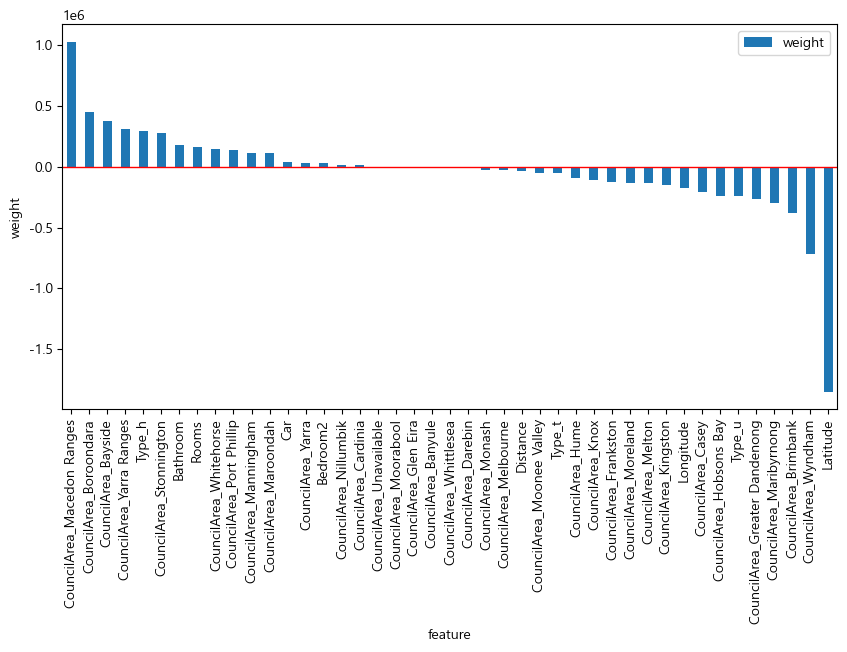

In [68]:
# 모델이 어떤 특성에 가중치를 많이 줬는지 시각적으로 확인
# 그래프를 그리기 위해 가중치 - 컬럼명을 하나의 DF에 넣어보자.
weight_df = pd.DataFrame({
    "feature" : X_train.columns,
    "weight" : linear_model.coef_
})

# 가중치 순으로 df 정렬(내림차순)
weight_df = weight_df.sort_values("weight", ascending = False)

# 시각화(막대그래프)
weight_df.plot(
    kind = 'bar',
    x = "feature",
    y = "weight",
    figsize = (10, 5)
)

# y = 0 가로 선 추가
plt.axhline(0, color = 'red', linewidth = 1)
plt.xlabel("feature")
plt.ylabel("weight")
plt.show()

# coef_(가중치)가 양수 -> 해당 특성값이 커질수록(또는 해당 범주가 1이면) Price가 증가하는 방향.
# 반대로 음수면 해당 특성값이 커질수록 Price가 감소하는 방향을 의미
# 가중치 절댓값이 클수록 Price 예측에 미치는 영향이 큼

# 양의 가중치가 큰 부분은 대체로 특정 CouncilArea(지역)들이 많음을 확인
# 해당 지역에 속할 경우 집값이 높게 예측함을 의미

# 가중치가 거의 0에 가까운 특성은, 모델 관점에서 Price에 큰 영향을 주지 않는다는 뜻

# CouncilArea_Wyndham, Lattitude, CouncilArea_Brimbank 등은 음의 가중치가 크게 나타남
# 해당 지역에 속하면(=원핫 값이 1), 예측 값이 낮아지는 쪽으로 작용.
# 예: Lattitude(위도)는 도시 중심에서의 위치나 지리적 특성과 연관 있을 수 있음
 # (남반구에선 위도가 달라지면 시내와의 거리, 주택 가격 패턴 등이 달라짐).

In [69]:
# 모델 평가.
# 점수 : 회귀모델 score -> r2 score
linear_model.score(X_test, y_test)

0.5975425806206309

In [70]:
# 다양한 회귀 모델 지표 확인
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [73]:
y_pred = linear_model.predict(X_test)
# 1. r2
print("R2 score :", r2_score(y_test, y_pred))
# MAE
print("MAE :", mean_absolute_error(y_test, y_pred))
# MSE -> 값이 엄청 커짐 + 단위가 제곱이 돼서 사람이 직관적으로 받아들이기 힘듦
print("MSE :", mean_squared_error(y_test, y_pred))
# RMSE -> MSE에 제곱근을 취한 값
print("RMSE :", mean_squared_error(y_test, y_pred) ** 0.5)
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score : 0.5975425806206309
MAE : 262576.1373489004
MSE : 171722276793.42062
RMSE : 414393.86674204125
RMSE : 414393.86674204125


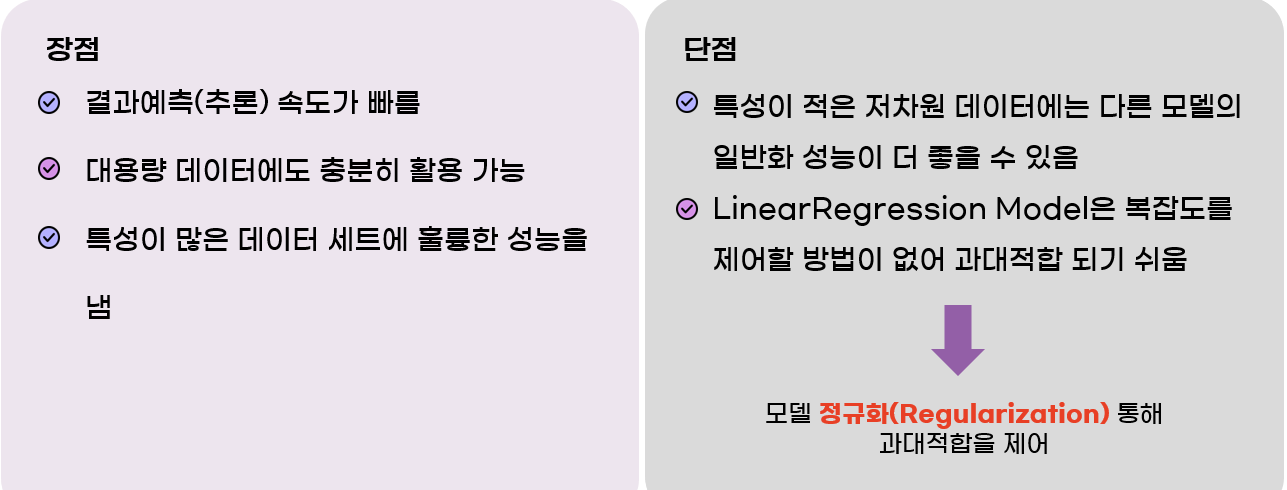

## L1 규제와 L2 규제

- **L1 규제 (Lasso)**
  - 가중치(계수)들의 절댓값 합을 규제항(페널티)으로 추가
  - 불필요한 가중치를 0으로 만들어서 특성 선택(Feature Selection)의 효과
  - $\lambda \sum |w|$ 형태의 페널티를 적용

- **L2 규제 (Ridge)**
  - 가중치(계수)들의 제곱 합을 규제항으로 추가  
  - 큰 가중치에 대해 페널티를 크게 부여하여, 모델 파라미터들이 전체적으로 고르게 작아지도록 만듦
  - $\lambda \sum w^2$ 형태의 페널티를 적용

- **규제(Regularization)의 역할**
  - 모델이 너무 복잡해져서 과적합(Overfitting)되지 않도록 제어
  - 가중치가 지나치게 커지는 것을 방지해서, 일반화(Generalization) 성능 향상
  - $ \lambda $ 계수를 통해 규제의 강도를 조절 ( $ \lambda $ 가 클수록 규제 강도 ↑ )